# *scikit-image* demo

In [1]:
# import all modules and submodules used in this demo

import os

import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import skimage.exposure
import skimage.measure
import skimage.filters

In [2]:
%matplotlib inline

Shape: (512, 512, 3)
Range: uint8 0 255


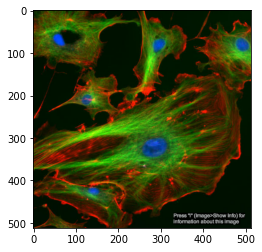

In [3]:
fname = os.path.join("./data", "FluorescentCells.tif")
fluocells = skimage.io.imread(fname)
print("Shape:", fluocells.shape)
print("Range:", fluocells.dtype, fluocells.min(), fluocells.max())

plt.clf()
plt.imshow(fluocells);

In [4]:
# extract red, green, and blue channels

fluocells_r = fluocells[:, :, 0] # red
fluocells_g = fluocells[:, :, 1] # green
fluocells_b = fluocells[:, :, 2] # blue

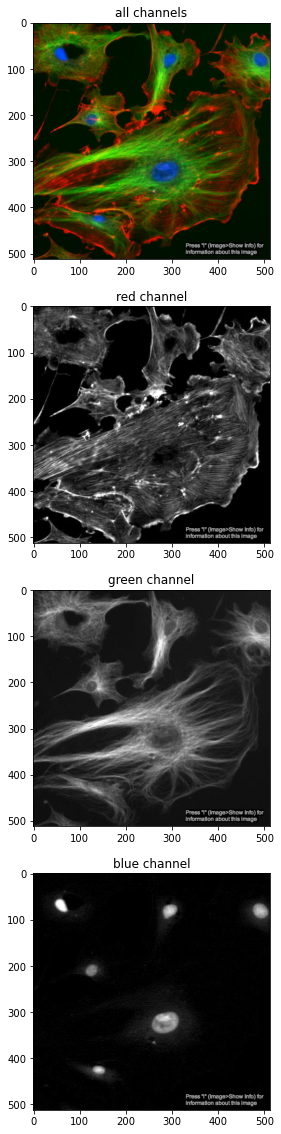

In [5]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 20))

ax[0].imshow(fluocells)
ax[0].set_title("all channels")

ax[1].imshow(fluocells_r, cmap="gray")
ax[1].set_title("red channel")

ax[2].imshow(fluocells_g, cmap="gray")
ax[2].set_title("green channel")

ax[3].imshow(fluocells_b, cmap="gray")
ax[3].set_title("blue channel");

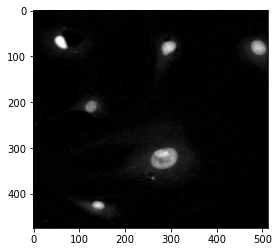

In [6]:
# remove the text; to do directly on the data file

fluocells_b = fluocells_b[:475, :]
plt.imshow(fluocells_b, cmap="gray");

## Filtering and segmentation

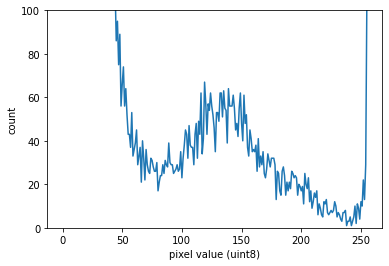

In [7]:
hist, bins = skimage.exposure.histogram(fluocells_b)
plt.plot(bins, hist)
plt.ylim(0, 100)
# plt.title("fluocells_b pixel values")
plt.xlabel(f"pixel value ({fluocells_b.dtype})")
plt.ylabel("count");

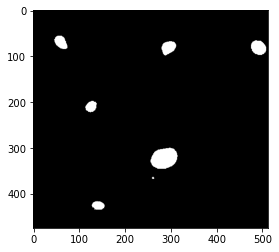

In [8]:
threshold = 80
nuclei = (fluocells_b > threshold).astype(int)

plt.imshow(nuclei, cmap="gray");

Background pixels are

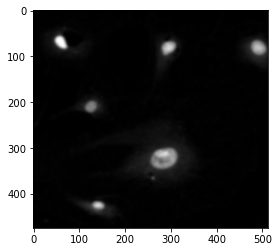

In [10]:
fluocells_b_filtered = skimage.filters.gaussian(fluocells_b,
                                                sigma=2,
                                                preserve_range=True)

plt.imshow(fluocells_b_filtered, cmap="gray");

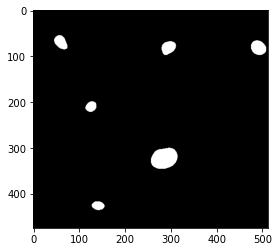

In [11]:
threshold = 80
true_nuclei = (fluocells_b_filtered > threshold).astype(int)

plt.imshow(true_nuclei, cmap="gray");

Background pixels have been filtered out.

Number of nuclei: 6


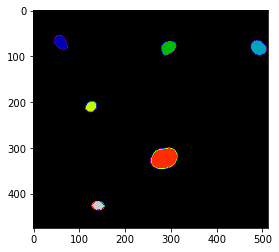

In [12]:
nuclei_lab, nuclei_num = skimage.measure.label(true_nuclei, return_num=True)
print("Number of nuclei:", nuclei_num)

plt.imshow(nuclei_lab, cmap="nipy_spectral");

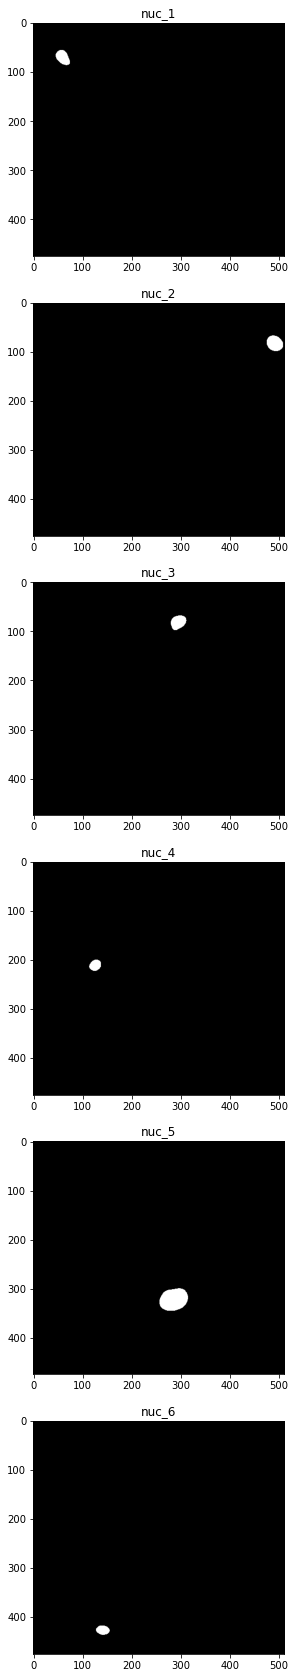

In [13]:
nuclei_obj = []
for i in range(nuclei_num):
    nuc = (nuclei_lab == i + 1)
    nuclei_obj.append(nuc)

fig, ax = plt.subplots(nrows=nuclei_num, ncols=1, figsize=(30, 30))

for i, nuc in enumerate(nuclei_obj):
    ax[i].imshow(nuc, cmap="gray")
    ax[i].set_title("nuc_" + str(i + 1))

## Measurements

nuc_1 area: 633 pixels
nuc_2 area: 829 pixels
nuc_3 area: 708 pixels
nuc_4 area: 426 pixels
nuc_5 area: 2111 pixels
nuc_6 area: 413 pixels


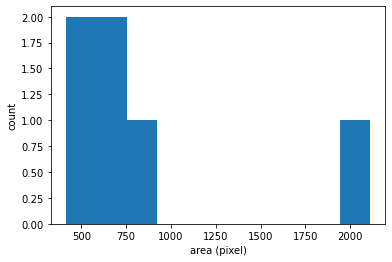

In [17]:
# nuclei areas

nuc_areas = np.zeros(nuclei_num, int)

for i in range(nuclei_num):
    nuc_areas[i] = np.sum(nuclei_obj[i])
    print(f"nuc_{i + 1} area: {nuc_areas[i]} pixels")
    
plt.hist(nuc_areas, bins=10)
plt.xlabel("area (pixel)")
plt.ylabel("count");

nuc_1 mean intensity: 194 per pixel
nuc_2 mean intensity: 144 per pixel
nuc_3 mean intensity: 155 per pixel
nuc_4 mean intensity: 115 per pixel
nuc_5 mean intensity: 139 per pixel
nuc_6 mean intensity: 149 per pixel


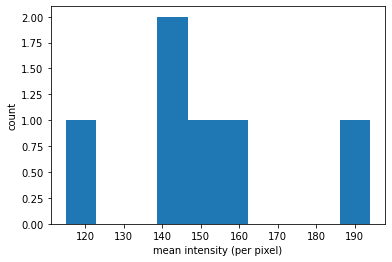

In [18]:
# nuclei mean intensities

nuc_ints = np.zeros(nuclei_num, int)

for i in range(nuclei_num):
    nuc_ints[i] = np.sum(nuclei_obj[i] * fluocells_b) / nuc_areas[i]
    print(f"nuc_{i + 1} mean intensity: {nuc_ints[i]} per pixel")
nuc_ints

plt.hist(nuc_ints, bins=10)
plt.xlabel("mean intensity (per pixel)")
plt.ylabel("count");

### Measuring nuclei areas and intensities using *scikit-image* functions

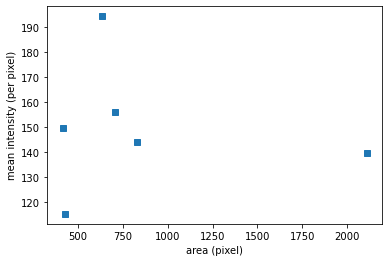

In [20]:
nuclei_props = skimage.measure.regionprops(nuclei_lab,
                                           intensity_image=fluocells_b)

nuclei_props_areas = np.zeros(nuclei_num)
nuclei_props_ints = np.zeros(nuclei_num)

for i in range(len(nuclei_props)):
    nuclei_props_areas[i] = nuclei_props[i].area
    nuclei_props_ints[i] = nuclei_props[i].mean_intensity

plt.plot(nuclei_props_areas, nuclei_props_ints, "s")
plt.xlabel("area (pixel)")
plt.ylabel("mean intensity (per pixel)");